In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
# !git clone https://github.com/QuocThangNguyen/deep-metric-learning-tsinghua-dogs.git

In [4]:
%cd deep-metric-learning-tsinghua-dogs

/content/drive/MyDrive/deep-metric-learning-tsinghua-dogs


In [5]:
!pwd

/content/drive/MyDrive/deep-metric-learning-tsinghua-dogs


In [6]:
!ls /content/drive/MyDrive/deep-metric-learning-tsinghua-dogs/src/checkpoints

softtriple-resnet50.pth


In [8]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.4 MB/s eta 0:00:00


In [9]:
!CUDA_VISIBLE_DEVICES=0 PYTHONPATH=/content/drive/MyDrive/deep-metric-learning-tsinghua-dogs python src/infer.py --image_path /content/drive/MyDrive/dog_nose/test_images/dog1_1.jpg --reference_images_dir /content/drive/MyDrive/DogDataset --checkpoint_path /content/drive/MyDrive/deep-metric-learning-tsinghua-dogs/src/checkpoints/softtriple-resnet50.pth

23-Jun-09 08:03:14  root  INFO: Initialized device cpu
23-Jun-09 08:03:21  root  INFO: Loaded checkpoint at /content/drive/MyDrive/deep-metric-learning-tsinghua-dogs/src/checkpoints/softtriple-resnet50.pth
23-Jun-09 08:03:21  root  INFO: Loaded config: {'batch_size': 48,
 'embedding_size': 128,
 'gamma': 0.1,
 'image_size': 448,
 'lambda': 20,
 'lr': 0.0001,
 'margin': 0.01,
 'n_centers_per_class': 5,
 'pretrained': True,
 'tau': 0.0}
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
23-Jun-09 08:03:21  root  INFO: Initialized model: R

In [ ]:
!git clone https://github.com/mv-lab/swin2sr.git

Cloning into 'swin2sr'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 172 (delta 12), reused 8 (delta 4), pack-reused 146
Receiving objects: 100% (172/172), 20.30 MiB | 29.15 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
%cd swin2sr

/content/swin2sr


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00


In [ ]:
!python main_test_swin2sr.py --task real_sr --scale 4 --model_path model_zoo/swin2sr/Swin2SR_RealworldSR_X4_64_BSRGAN_PSNR.pth --folder_lq testsets/a

loading model from model_zoo/swin2sr/Swin2SR_RealworldSR_X4_64_BSRGAN_PSNR.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Testing 0 50                  
Testing 1 6                   
Testing 2 8                   
Testing 3 9                   


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# os.chdir("./swin2sr")

In [ ]:
def load_img (filename, debug=False, norm=True, resize=None):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if norm:   
        img = img / 255.
        img = img.astype(np.float32)
    if debug:
        print (img.shape, img.dtype, img.min(), img.max())
        
    if resize:
        img = cv2.resize(img, (resize[0], resize[1]))
        
    return img

def plot_all (images, axis='off', figsize=(16, 8)):
    
    fig = plt.figure(figsize=figsize, dpi=80)
    nplots = len(images)
    for i in range(nplots):
        plt.subplot(1,nplots,i+1)
        plt.axis(axis)
        plt.imshow(images[i])
    plt.show()

Processing ./testsets/a/50.png. Upscaling resolution from (52, 70, 3) to (208, 280, 3)


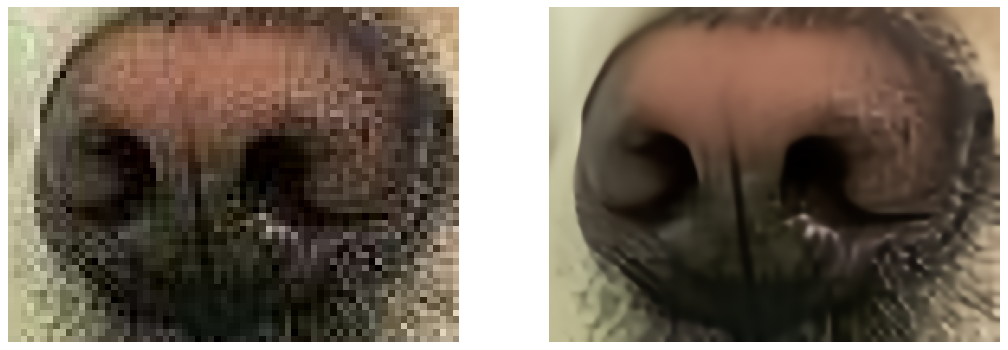

Processing ./testsets/a/6.png. Upscaling resolution from (106, 140, 3) to (424, 560, 3)


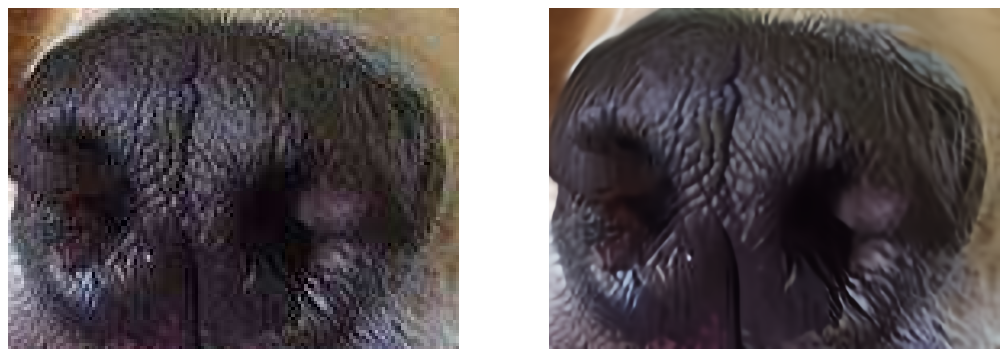

Processing ./testsets/a/8.png. Upscaling resolution from (103, 131, 3) to (412, 524, 3)


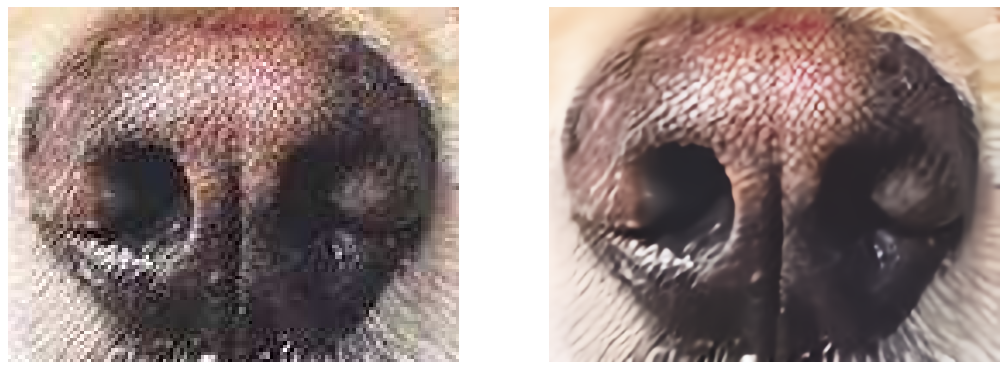

Processing ./testsets/a/9.png. Upscaling resolution from (125, 181, 3) to (500, 724, 3)


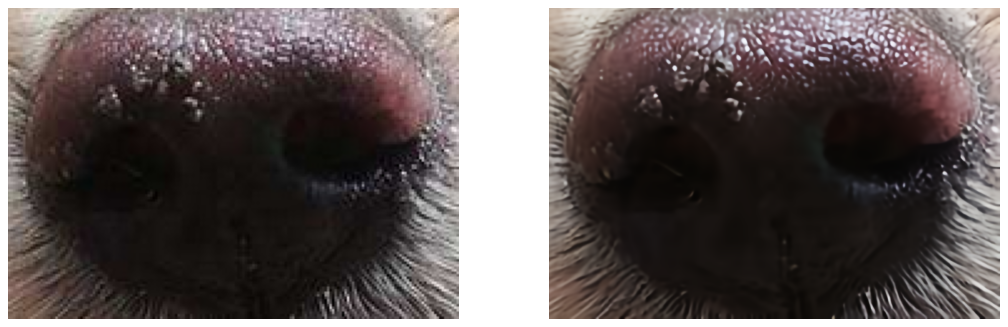

In [ ]:
inputs  = sorted(glob('./testsets/a/*'))
outputs = sorted(glob('./results/swin2sr_real_sr_x4/*')) # the path to the folder above

for input_img_path, output_img_path in zip(inputs, outputs):

    img_input  = load_img(input_img_path)
    img_output = load_img(output_img_path)
    
    print (f'Processing {input_img_path}. Upscaling resolution from {img_input.shape} to {img_output.shape}')
    plot_all([img_input, img_output])